<a href="https://colab.research.google.com/github/Chamngo-create/Homework/blob/main/Ng%C3%B4_Th%E1%BB%8B_B%C3%ADch_Ch%C3%A2m_31241025303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.7 MB/s eta 0:00:00


1.2324113955341665


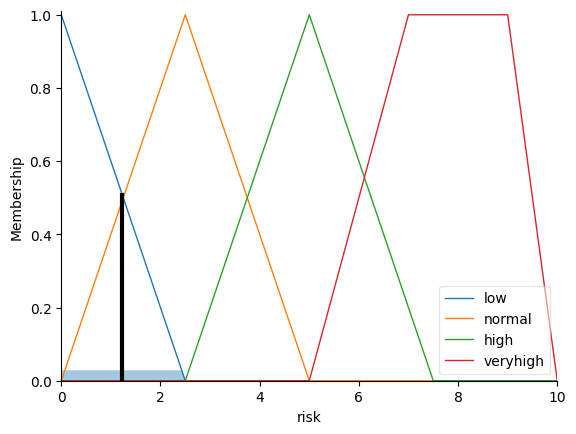

In [ ]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sugar= ctrl.Antecedent(np.arange(80,200.1,0.1),'sugar')
BMI= ctrl.Antecedent(np.arange(15,120.1,0.1),'BMI')
urination= ctrl.Antecedent(np.arange(0,10,0.1),'urination')
fatigue= ctrl.Antecedent(np.arange(0,100.1,1),'fatigue')
risk= ctrl.Consequent(np.arange(0,10.1,0.1),'risk')

sugar['low']=fuzz.gaussmf(sugar.universe,0,15)
sugar['normal']=fuzz.gaussmf(sugar.universe,120,15)
sugar['high']=fuzz.gaussmf(sugar.universe,0,15)
sugar['veryhigh']=fuzz.gaussmf(sugar.universe,200,15)

BMI['underweight']=fuzz.gaussmf(BMI.universe,15,1)
BMI['normal']=fuzz.gaussmf(BMI.universe,25,1)
BMI['overweight']=fuzz.gaussmf(BMI.universe,30,1)
BMI['obese']=fuzz.gaussmf(BMI.universe,45,1)

urination['rare']=fuzz.gaussmf(urination.universe,3,1)
urination['sometime']=fuzz.gaussmf(urination.universe,5,1)
urination['often']=fuzz.gaussmf(urination.universe,10,1)


fatigue['low']=fuzz.trimf(fatigue.universe,[0,0,5])
fatigue['medium']=fuzz.trimf(fatigue.universe,[0,5,10])
fatigue['high']=fuzz.trimf(fatigue.universe,[5,10,10])


risk['low']=fuzz.trimf(risk.universe,[0,0,2.5])
risk['normal']=fuzz.trimf(risk.universe,[0,2.5,5])
risk['high']=fuzz.trimf(risk.universe,[2.5,5,7.5])
risk['veryhigh'] = fuzz.trapmf(risk.universe, [5, 7, 9, 10])


rule1= ctrl.Rule(sugar['veryhigh']&urination['often'],risk['veryhigh'])
rule2= ctrl.Rule(sugar['veryhigh']&urination['sometime'],risk['high'])
rule3= ctrl.Rule(sugar['high']&urination['often'],risk['high'])
rule4= ctrl.Rule(sugar['normal']&urination['rare'],risk['low'])
rule5= ctrl.Rule(sugar['veryhigh']&BMI['obese'],risk['veryhigh'])
rule6= ctrl.Rule(sugar['veryhigh']&BMI['overweight'],risk['high'])
rule7= ctrl.Rule(sugar['high']&BMI['overweight'],risk['high'])
rule8= ctrl.Rule(sugar['high']&BMI['normal'],risk['normal'])
rule9= ctrl.Rule(sugar['normal']&BMI['normal'],risk['low'])
rule10= ctrl.Rule(sugar['veryhigh']&fatigue['high'],risk['veryhigh'])
rule11= ctrl.Rule(sugar['high']&fatigue['high'],risk['high'])
rule12= ctrl.Rule(sugar['high']&fatigue['medium'],risk['normal'])
rule13= ctrl.Rule(sugar['normal']&fatigue['low'],risk['low'])

risking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
risking=ctrl.ControlSystemSimulation(risking_ctrl)

risking.input['sugar']=70
risking.input['urination']=5
risking.input['BMI']=25
risking.input['fatigue']=5
risking.compute()
print(risking.output['risk'])
risk.view(sim=risking)

126.18960425564515


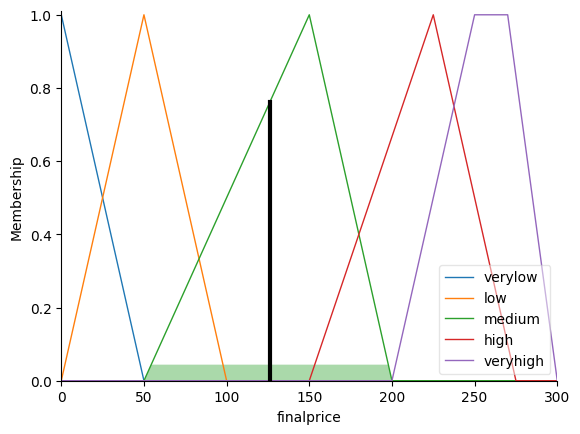

In [ ]:
#2.3
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demandlevel=ctrl.Antecedent(np.arange(0,100.1,0.1),'demandlevel')
competitorpricing=ctrl.Antecedent(np.arange(0,200.1,0.1),'competitorpricing')
productioncost = ctrl.Antecedent(np.arange(0, 150.1, 0.1), 'productioncost')
seasonality=ctrl.Antecedent(np.arange(0,10.1,0.1),'seasonality')
stocklevel=ctrl.Antecedent(np.arange(0,100.1,0.1),'stocklevel')
finalprice=ctrl.Consequent(np.arange(0,300.1,0.1),'finalprice')

demandlevel['low']=fuzz.gaussmf(demandlevel.universe,0,10)
demandlevel['medium']=fuzz.gaussmf(demandlevel.universe,50,10)
demandlevel['high']=fuzz.gaussmf(demandlevel.universe,100,10)

competitorpricing['low']=fuzz.gaussmf(competitorpricing.universe,0,10)
competitorpricing['medium']=fuzz.gaussmf(competitorpricing.universe,100,10)
competitorpricing['high']=fuzz.gaussmf(competitorpricing.universe,200,10)

productioncost['low']=fuzz.gaussmf(productioncost.universe,0,10)
productioncost['medium']=fuzz.gaussmf(productioncost.universe,75,10)
productioncost['high']=fuzz.gaussmf(productioncost.universe,150,10)

seasonality['off_peak']=fuzz.gaussmf(seasonality.universe,0,1)
seasonality['normal']=fuzz.gaussmf(seasonality.universe,5,1)
seasonality['peak']=fuzz.gaussmf(seasonality.universe,10,1)

stocklevel['low']=fuzz.gaussmf(stocklevel.universe,0,10)
stocklevel['medium']=fuzz.gaussmf(stocklevel.universe,50,10)
stocklevel['high']=fuzz.gaussmf(stocklevel.universe,100,10)


finalprice['verylow'] = fuzz.trimf(finalprice.universe, [0, 0, 50])
finalprice['low'] = fuzz.trimf(finalprice.universe, [0, 50, 100])
finalprice['medium'] = fuzz.trimf(finalprice.universe, [50, 150, 200])
finalprice['high'] = fuzz.trimf(finalprice.universe, [150, 225, 275])
finalprice['veryhigh'] = fuzz.trapmf(finalprice.universe, [200, 250, 270, 300])

rule1=ctrl.Rule(demandlevel['high']&competitorpricing['high']&stocklevel['low'],finalprice['veryhigh'])
rule2=ctrl.Rule(demandlevel['high']&seasonality['peak']&stocklevel['low'],finalprice['veryhigh'])
rule3=ctrl.Rule(demandlevel['medium']&productioncost['high']&stocklevel['low'],finalprice['veryhigh'])
rule4=ctrl.Rule(demandlevel['high']&competitorpricing['medium']&stocklevel['medium'],finalprice['high'])
rule5=ctrl.Rule(demandlevel['medium']&competitorpricing['high']&stocklevel['low'],finalprice['high'])
rule6=ctrl.Rule(demandlevel['high']&seasonality['peak']&stocklevel['medium'],finalprice['high'])
rule7=ctrl.Rule(demandlevel['medium']&competitorpricing['medium']&stocklevel['medium'],finalprice['medium'])
rule8=ctrl.Rule(demandlevel['low']&competitorpricing['high']&stocklevel['medium'],finalprice['medium'])
rule9=ctrl.Rule(demandlevel['medium']&productioncost['medium']&stocklevel['medium'],finalprice['medium'])
rule10=ctrl.Rule(demandlevel['low']&competitorpricing['medium']&stocklevel['high'],finalprice['low'])
rule11=ctrl.Rule(demandlevel['medium']&productioncost['low']&stocklevel['high'],finalprice['low'])
rule12=ctrl.Rule(demandlevel['low']&seasonality['off_peak']&stocklevel['high'],finalprice['low'])
rule13=ctrl.Rule(demandlevel['low']&competitorpricing['low']&stocklevel['high'],finalprice['verylow'])
rule14=ctrl.Rule(demandlevel['low']&seasonality['off_peak']&stocklevel['high'],finalprice['verylow'])
rule15=ctrl.Rule(demandlevel['medium']&competitorpricing['low']&stocklevel['high'],finalprice['verylow'])

finalpricing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
finalpricing=ctrl.ControlSystemSimulation(finalpricing_ctrl)

finalpricing.input['demandlevel']=60
finalpricing.input['competitorpricing']=50
finalpricing.input['productioncost']=50
finalpricing.input['seasonality']=6
finalpricing.input['stocklevel']=30
finalpricing.compute()
print(finalpricing.output['finalprice'])
finalprice.view(sim=finalpricing)


68.91614255765202
25.00000000000004


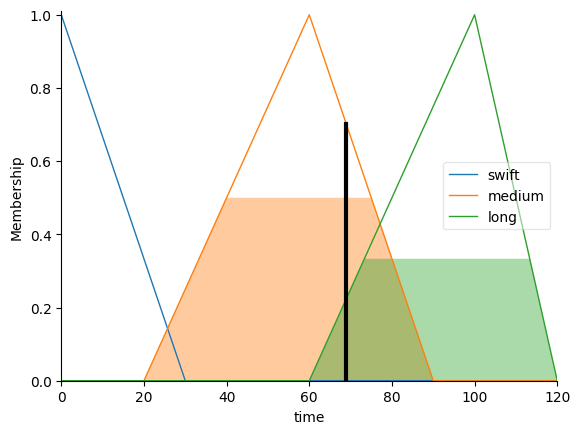

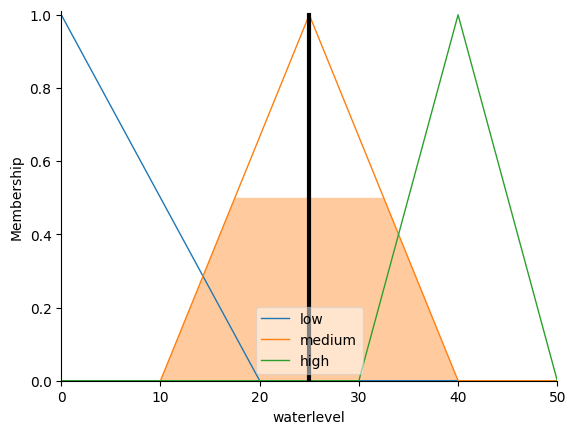

In [ ]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


load=ctrl.Antecedent(np.arange(0,10.1,0.1),'load')
dirtlevel=ctrl.Antecedent(np.arange(0,100.1,0.1),'dirtlevel')
fabrictype=ctrl.Antecedent(np.arange(0,100.1,0.1),'fabrictype')
time=ctrl.Consequent(np.arange(0,120.1,0.1),'time')
waterlevel=ctrl.Consequent(np.arange(0,50.1,0.1),'waterlevel')

load['small'] = fuzz.trimf(load.universe, [0, 0, 4])
load['medium'] = fuzz.trimf(load.universe, [2, 5, 8])
load['large'] = fuzz.trimf(load.universe, [6, 10, 10])

dirtlevel['low'] = fuzz.trimf(dirtlevel.universe, [0, 0, 30])
dirtlevel['medium'] = fuzz.trimf(dirtlevel.universe, [20, 50, 80])
dirtlevel['high'] = fuzz.trimf(dirtlevel.universe, [60, 100, 100])

fabrictype['delicate'] = fuzz.trimf(fabrictype.universe, [0, 0, 30])
fabrictype['normal'] = fuzz.trimf(fabrictype.universe, [20, 50, 80])
fabrictype['heavy'] = fuzz.trimf(fabrictype.universe, [60, 100, 100])

time['swift'] = fuzz.trimf(time.universe, [0, 0, 30])
time['medium'] = fuzz.trimf(time.universe, [20, 60, 90])
time['long'] = fuzz.trimf(time.universe, [60, 100, 120])

waterlevel['low'] = fuzz.trimf(waterlevel.universe, [0, 0, 20])
waterlevel['medium'] = fuzz.trimf(waterlevel.universe, [10, 25, 40])
waterlevel['high'] = fuzz.trimf(waterlevel.universe, [30, 40, 50])

rule1=ctrl.Rule(load['small']&dirtlevel['low'],[time['swift'],waterlevel['low']])
rule2=ctrl.Rule(load['small']&dirtlevel['medium'],[time['medium'],waterlevel['medium']])
rule3=ctrl.Rule(load['small']&dirtlevel['high'],[time['long'],waterlevel['medium']])
rule4=ctrl.Rule(load['medium']&dirtlevel['low'],[time['medium'],waterlevel['medium']])
rule5=ctrl.Rule(load['medium']&dirtlevel['medium'],[time['long'],waterlevel['medium']])
rule6=ctrl.Rule(load['medium']&dirtlevel['high'],[time['long'],waterlevel['high']])
rule7=ctrl.Rule(load['large']&dirtlevel['low'],[time['medium'],waterlevel['high']])
rule8=ctrl.Rule(load['large']&dirtlevel['low'],[time['long'],waterlevel['high']])
rule9=ctrl.Rule(load['large']&dirtlevel['medium'],[time['long'],waterlevel['high']])
rule10=ctrl.Rule(load['large']&dirtlevel['high'],[time['long'],waterlevel['high']])
rule11=ctrl.Rule(fabrictype['delicate'],[time['swift'],waterlevel['low']])
rule12=ctrl.Rule(fabrictype['normal'],[time['medium'],waterlevel['medium']])
rule13=ctrl.Rule(fabrictype['heavy'],[time['long'],waterlevel['high']])
rule14=ctrl.Rule(load['large']&dirtlevel['high']&fabrictype['heavy'],[time['long'],waterlevel['high']])
rule15=ctrl.Rule(load['small']&dirtlevel['low']&fabrictype['delicate'],[time['swift'],waterlevel['low']])
rule16=ctrl.Rule(load['medium']&dirtlevel['medium']&fabrictype['normal'],[time['medium'],waterlevel['medium']])

timing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
timing=ctrl.ControlSystemSimulation(timing_ctrl)

timing.input['load']=3
timing.input['dirtlevel']=40
timing.input['fabrictype']=35
timing.compute()
print(timing.output['time'])
print(timing.output['waterlevel'])
time.view(sim=timing)
waterlevel.view(sim=timing)



19.999999999999996
35.00000000000001


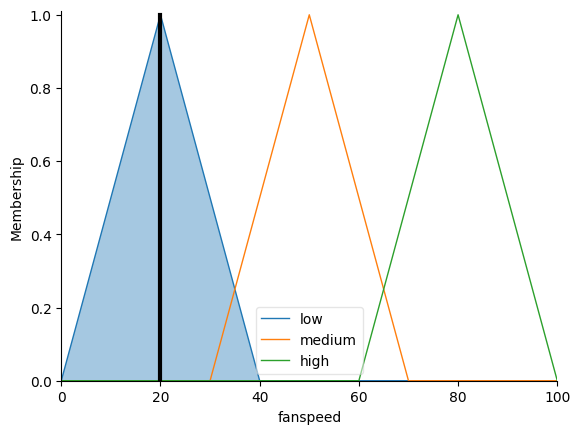

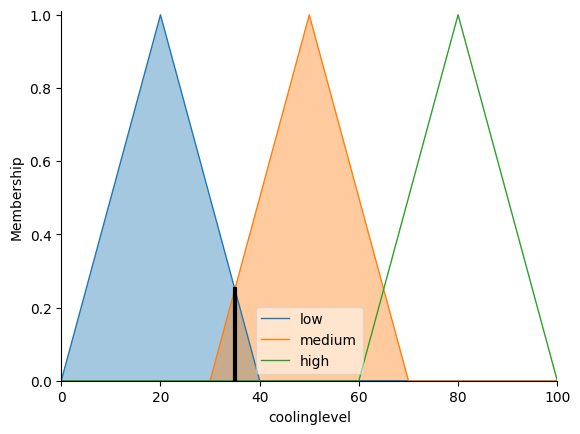

In [ ]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature=ctrl.Antecedent(np.arange(0,50.1,0.1),'temperature')
humiditylevel=ctrl.Antecedent(np.arange(0,100.1,0.1),'humiditylevel')
people=ctrl.Antecedent(np.arange(0,20.1,0.1),'people')
fanspeed=ctrl.Consequent(np.arange(0,100.1,0.1),'fanspeed')
coolinglevel=ctrl.Consequent(np.arange(0,100.1,0.1),'coolinglevel')

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 5, 15])
temperature['cool'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [20, 27, 35])
temperature['warm'] = fuzz.trimf(temperature.universe, [30, 38, 45])
temperature['hot'] = fuzz.trimf(temperature.universe, [40, 45, 50])


humiditylevel['low'] = fuzz.trimf(humiditylevel.universe, [0, 10, 30])
humiditylevel['medium'] = fuzz.trimf(humiditylevel.universe, [20, 50, 80])
humiditylevel['high'] = fuzz.trimf(humiditylevel.universe, [70, 90, 100])

people['few'] = fuzz.trimf(people.universe, [0, 2, 8])
people['moderate'] = fuzz.trimf(people.universe, [5, 10, 15])
people['many'] = fuzz.trimf(people.universe, [12, 18, 20])

fanspeed['low'] = fuzz.trimf(fanspeed.universe, [0, 20, 40])
fanspeed['medium'] = fuzz.trimf(fanspeed.universe, [30, 50, 70])
fanspeed['high'] = fuzz.trimf(fanspeed.universe, [60, 80, 100])

coolinglevel['low'] = fuzz.trimf(coolinglevel.universe, [0, 20, 40])
coolinglevel['medium'] = fuzz.trimf(coolinglevel.universe, [30, 50, 70])
coolinglevel['high'] = fuzz.trimf(coolinglevel.universe, [60, 80, 100])

rule1=ctrl.Rule(temperature['cold'],fanspeed['low'])
rule2=ctrl.Rule(temperature['cool'],fanspeed['low'])
rule3=ctrl.Rule(temperature['comfortable'],fanspeed['medium'])
rule4=ctrl.Rule(temperature['warm'],fanspeed['high'])
rule5=ctrl.Rule(temperature['hot'],fanspeed['high'])
rule6=ctrl.Rule(temperature['cold'],coolinglevel['low'])
rule7=ctrl.Rule(temperature['cool'],coolinglevel['low'])
rule8=ctrl.Rule(temperature['comfortable'],coolinglevel['medium'])
rule9=ctrl.Rule(temperature['warm'],coolinglevel['high'])
rule10=ctrl.Rule(temperature['hot'],coolinglevel['high'])
rule11=ctrl.Rule(humiditylevel['medium'],coolinglevel['medium'])
rule12=ctrl.Rule(humiditylevel['high'],coolinglevel['high'])
rule13=ctrl.Rule(people['few'],fanspeed['low'])
rule14=ctrl.Rule(people['moderate'],fanspeed['medium'])
rule15=ctrl.Rule(people['many'],fanspeed['high'])
rule16=ctrl.Rule(temperature['hot']&humiditylevel['high']&people['many'],fanspeed['high'],coolinglevel['high'])
rule17=ctrl.Rule(temperature['comfortable']&humiditylevel['medium']&people['moderate'],fanspeed['medium'],coolinglevel['medium'])
rule18=ctrl.Rule(temperature['cool']&humiditylevel['low']&people['few'],fanspeed['low'],coolinglevel['low'])

fanspeeding_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
fanspeeding=ctrl.ControlSystemSimulation(fanspeeding_ctrl)

fanspeeding.input['temperature']=5
fanspeeding.input['humiditylevel']=50
fanspeeding.input['people']=50
fanspeeding.compute()
print(fanspeeding.output['fanspeed'])
print(fanspeeding.output['coolinglevel'])
fanspeed.view(sim=fanspeeding)
coolinglevel.view(sim=fanspeeding)


9.999999999999988
86.60000000000001


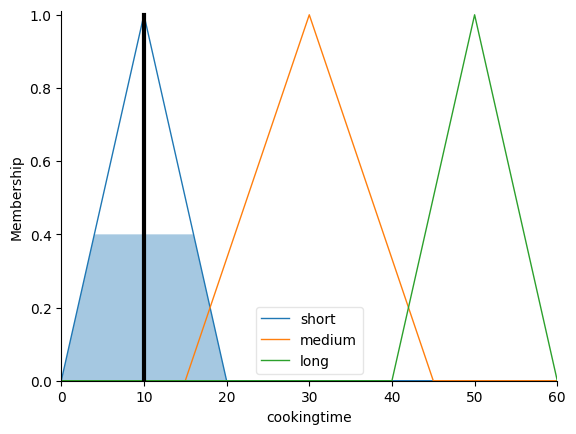

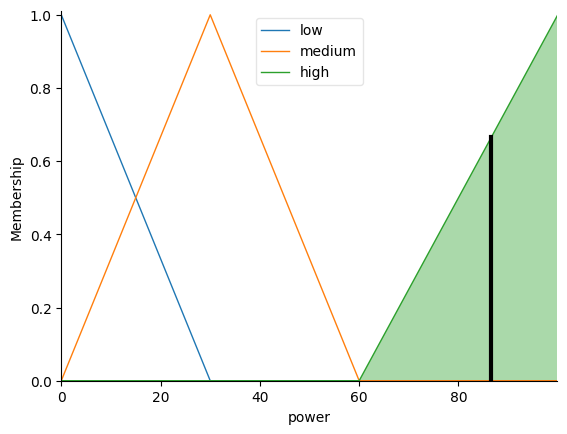

In [ ]:
#2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'weight')
foodtype = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'foodtype')
foodtemperature = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'foodtemperature')
cookingtime = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'cookingtime')
power = ctrl.Consequent(np.arange(0, 100, 0.1), 'power')

weight['light'] = fuzz.trimf(weight.universe, [0, 10, 30])
weight['medium'] = fuzz.trimf(weight.universe, [20, 50, 80])
weight['heavy'] = fuzz.trimf(weight.universe, [70, 90, 100])

foodtype['soft'] = fuzz.trimf(foodtype.universe, [0, 0.5, 1])
foodtype['medium'] = fuzz.trimf(foodtype.universe, [0.8, 1.2, 1.8])
foodtype['hard'] = fuzz.trimf(foodtype.universe, [1.5, 2, 2])

foodtemperature['cold'] = fuzz.trimf(foodtemperature.universe, [0, 5, 10])
foodtemperature['warm'] = fuzz.trimf(foodtemperature.universe, [10, 20, 30])
foodtemperature['hot'] = fuzz.trimf(foodtemperature.universe, [40, 60, 100])

cookingtime['short'] = fuzz.trimf(cookingtime.universe, [0, 10, 20])
cookingtime['medium'] = fuzz.trimf(cookingtime.universe, [15, 30, 45])
cookingtime['long'] = fuzz.trimf(cookingtime.universe, [40, 50, 60])

power['low'] = fuzz.trimf(power.universe, [0,0,30])
power['medium'] = fuzz.trimf(power.universe, [0,30,60])
power['high'] = fuzz.trimf(power.universe, [60,100,100])

rule1=ctrl.Rule(weight['light'],cookingtime['short'])
rule2=ctrl.Rule(weight['medium'],cookingtime['medium'])
rule3=ctrl.Rule(weight['heavy'],cookingtime['long'])
rule4=ctrl.Rule(foodtype['soft'],power['low'])
rule5=ctrl.Rule(foodtype['medium'],power['medium'])
rule6=ctrl.Rule(foodtype['hard'],power['high'])
rule7=ctrl.Rule(foodtemperature['cold'],cookingtime['long'])
rule8=ctrl.Rule(foodtemperature['warm'],cookingtime['medium'])
rule9=ctrl.Rule(foodtemperature['hot'],cookingtime['short'])
rule10=ctrl.Rule(weight['heavy']&foodtype['hard']&foodtemperature['cold'],cookingtime['long'],power['high'])
rule11=ctrl.Rule(weight['medium']&foodtype['soft']&foodtemperature['warm'],cookingtime['medium'],power['low'])
rule12=ctrl.Rule(weight['light']&foodtype['medium']&foodtemperature['hot'],cookingtime['short'],power['medium'])

cookingtiming_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
cookingtiming=ctrl.ControlSystemSimulation(cookingtiming_ctrl)

cookingtiming.input['weight']=4
cookingtiming.input['foodtype']=70
cookingtiming.input['foodtemperature']=85
cookingtiming.compute()
print(cookingtiming.output['cookingtime'])
print(cookingtiming.output['power'])
cookingtime.view(sim=cookingtiming)
power.view(sim=cookingtiming)

Cooking time: 9.037037037037022
Heat level: 59.99999999999987


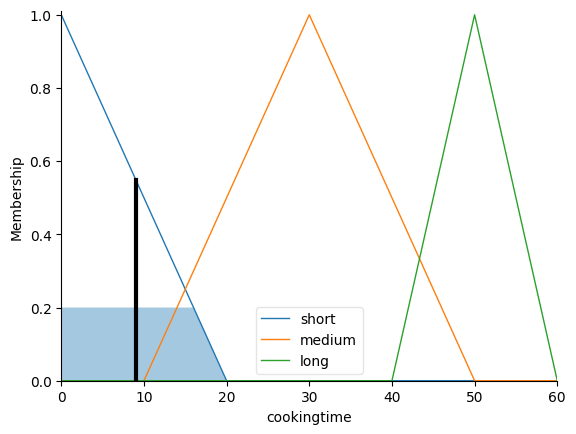

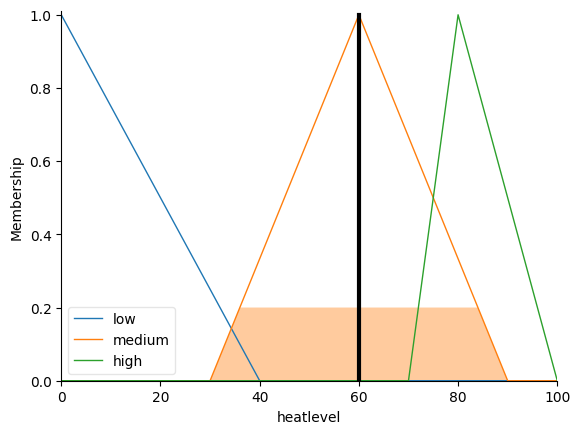

In [ ]:
#2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

foodtype = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'foodtype')
foodweight = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'foodweight')
temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'temperature')
watercontent = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'watercontent')
cookingtime = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'cookingtime')
heatlevel = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'heatlevel')

foodtype['soft'] = fuzz.trimf(foodtype.universe, [0, 0, 1])
foodtype['medium'] = fuzz.trimf(foodtype.universe, [0, 1, 2])
foodtype['hard'] = fuzz.trimf(foodtype.universe, [1, 2, 2])

foodweight['light'] = fuzz.trimf(foodweight.universe, [0, 0, 50])
foodweight['medium'] = fuzz.trimf(foodweight.universe, [25, 50, 75])
foodweight['heavy'] = fuzz.trimf(foodweight.universe, [50, 100, 100])

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 60, 60])

watercontent['low'] = fuzz.trimf(watercontent.universe, [0, 0, 50])
watercontent['medium'] = fuzz.trimf(watercontent.universe, [25, 50, 75])
watercontent['high'] = fuzz.trimf(watercontent.universe, [50, 70, 100])

cookingtime['short'] = fuzz.trimf(cookingtime.universe, [0, 0, 20])
cookingtime['medium'] = fuzz.trimf(cookingtime.universe, [10, 30, 50])
cookingtime['long'] = fuzz.trimf(cookingtime.universe, [40, 50, 60])

heatlevel['low'] = fuzz.trimf(heatlevel.universe, [0, 0, 40])
heatlevel['medium'] = fuzz.trimf(heatlevel.universe, [30, 60, 90])
heatlevel['high'] = fuzz.trimf(heatlevel.universe, [70, 80, 100])


rule1_time = ctrl.Rule(foodtype['soft'] & foodweight['light'] & temperature['hot'], cookingtime['short'])
rule1_heat = ctrl.Rule(foodtype['soft'] & foodweight['light'] & temperature['hot'], heatlevel['low'])
rule2_time = ctrl.Rule(foodtype['soft'] & foodweight['medium'] & temperature['warm'], cookingtime['short'])
rule2_heat = ctrl.Rule(foodtype['soft'] & foodweight['medium'] & temperature['warm'], heatlevel['medium'])
rule3_time = ctrl.Rule(foodtype['soft'] & foodweight['heavy'] & temperature['cold'], cookingtime['medium'])
rule3_heat = ctrl.Rule(foodtype['soft'] & foodweight['heavy'] & temperature['cold'], heatlevel['high'])
rule4_time = ctrl.Rule(foodtype['medium'] & foodweight['light'] & temperature['hot'], cookingtime['short'])
rule4_heat = ctrl.Rule(foodtype['medium'] & foodweight['light'] & temperature['hot'], heatlevel['medium'])
rule5_time = ctrl.Rule(foodtype['medium'] & foodweight['medium'] & watercontent['medium'], cookingtime['medium'])
rule5_heat = ctrl.Rule(foodtype['medium'] & foodweight['medium'] & watercontent['medium'], heatlevel['medium'])
rule6_time = ctrl.Rule(foodtype['medium'] & foodweight['heavy'] & watercontent['high'], cookingtime['long'])
rule6_heat = ctrl.Rule(foodtype['medium'] & foodweight['heavy'] & watercontent['high'], heatlevel['high'])
rule7_time = ctrl.Rule(foodtype['hard'] & foodweight['light'] & watercontent['medium'], cookingtime['medium'])
rule7_heat = ctrl.Rule(foodtype['hard'] & foodweight['light'] & watercontent['medium'], heatlevel['medium'])
rule8_time = ctrl.Rule(foodtype['hard'] & foodweight['medium'] & watercontent['low'], cookingtime['long'])
rule8_heat = ctrl.Rule(foodtype['hard'] & foodweight['medium'] & watercontent['low'], heatlevel['high'])
rule9_time = ctrl.Rule(foodtype['hard'] & foodweight['heavy'] & temperature['cold'], cookingtime['long'])
rule9_heat = ctrl.Rule(foodtype['hard'] & foodweight['heavy'] & temperature['cold'], heatlevel['high'])
rule10_time = ctrl.Rule(foodtype['hard'] & foodweight['medium'] & watercontent['low'], cookingtime['long'])
rule10_heat = ctrl.Rule(foodtype['hard'] & foodweight['medium'] & watercontent['low'], heatlevel['high'])
rule11_time = ctrl.Rule(foodtype['soft'] & temperature['cold'] & watercontent['high'], cookingtime['medium'])
rule11_heat = ctrl.Rule(foodtype['soft'] & temperature['cold'] & watercontent['high'], heatlevel['low'])
rule12_time = ctrl.Rule(foodtype['medium'] & temperature['warm'] & watercontent['low'], cookingtime['medium'])
rule12_heat = ctrl.Rule(foodtype['medium'] & temperature['warm'] & watercontent['low'], heatlevel['high'])
rule13_time = ctrl.Rule(foodtype['hard'] & temperature['cold'] & watercontent['medium'], cookingtime['long'])
rule13_heat = ctrl.Rule(foodtype['hard'] & temperature['cold'] & watercontent['medium'], heatlevel['medium'])
rule14_time = ctrl.Rule(foodtype['hard'] & foodweight['light'] & temperature['cold'] & watercontent['low'], cookingtime['medium'])
rule14_heat = ctrl.Rule(foodtype['hard'] & foodweight['light'] & temperature['cold'] & watercontent['low'], heatlevel['high'])


cookingtiming_ctrl = ctrl.ControlSystem([rule1_time, rule1_heat, rule2_time, rule2_heat, rule3_time, rule3_heat,rule4_time, rule4_heat, rule5_time, rule5_heat, rule6_time, rule6_heat,rule7_time, rule7_heat, rule8_time, rule8_heat, rule9_time, rule9_heat,rule10_time, rule10_heat, rule11_time, rule11_heat, rule12_time, rule12_heat,rule13_time, rule13_heat, rule14_time, rule14_heat])


cookingtiming = ctrl.ControlSystemSimulation(cookingtiming_ctrl)

cookingtiming.input['foodtype'] = 1
cookingtiming.input['foodweight'] = 40
cookingtiming.input['temperature'] = 70
cookingtiming.input['watercontent'] = 90
cookingtiming.compute()

print("Cooking time:", cookingtiming.output['cookingtime'])
print("Heat level:", cookingtiming.output['heatlevel'])

cookingtime.view(sim=cookingtiming)
heatlevel.view(sim=cookingtiming)


3.710876132930515
250.00000000000034
2.388888888888888


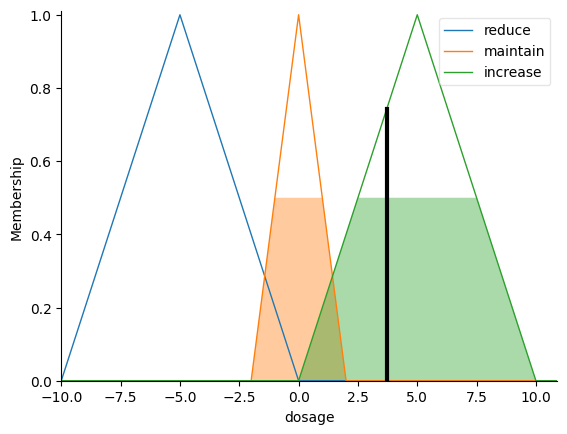

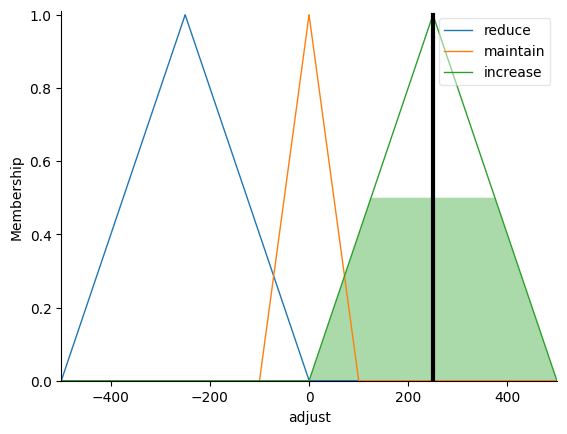

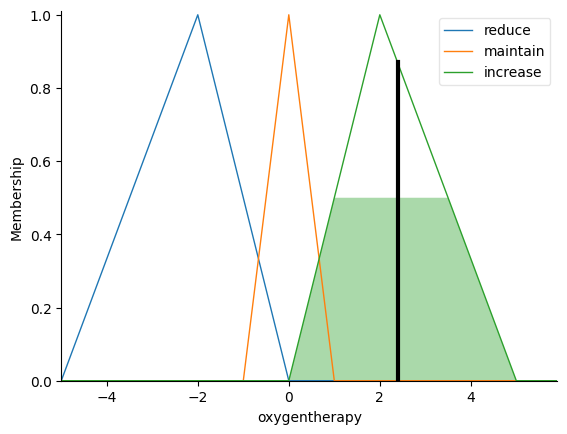

In [ ]:
#2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heartrate = ctrl.Antecedent(np.arange(50, 110.1, 0.1), 'heartrate')
bloodpressure = ctrl.Antecedent(np.arange(80, 140.1, 0.1), 'bloodpressure')
bodytemperature = ctrl.Antecedent(np.arange(34, 40.1, 0.1), 'bodytemperature')
oxygensaturation = ctrl.Antecedent(np.arange(85, 100.1, 0.1), 'oxygensaturation')
bloodsugarlevel = ctrl.Antecedent(np.arange(70, 180.1, 0.1), 'bloodsugarlevel')

dosage = ctrl.Consequent(np.arange(-10, 11, 0.1), 'dosage')
adjust = ctrl.Consequent(np.arange(-500, 501, 0.1), 'adjust')
oxygentherapy = ctrl.Consequent(np.arange(-5, 6, 0.1), 'oxygentherapy')


heartrate['low'] = fuzz.trimf(heartrate.universe, [50, 50, 70])
heartrate['normal'] = fuzz.trimf(heartrate.universe, [60, 80, 100])
heartrate['high'] = fuzz.trimf(heartrate.universe, [80, 100, 110])

bloodpressure['low'] = fuzz.trimf(bloodpressure.universe, [80, 90, 100])
bloodpressure['normal'] = fuzz.trimf(bloodpressure.universe, [90, 110, 130])
bloodpressure['high'] = fuzz.trimf(bloodpressure.universe, [120, 130, 140])

bodytemperature['low'] = fuzz.trimf(bodytemperature.universe, [34, 34, 36])
bodytemperature['normal'] = fuzz.trimf(bodytemperature.universe, [36, 37, 37.5])
bodytemperature['high'] = fuzz.trimf(bodytemperature.universe, [37.5, 38.5, 40])

oxygensaturation['low'] = fuzz.trimf(oxygensaturation.universe, [85, 88, 92])
oxygensaturation['normal'] = fuzz.trimf(oxygensaturation.universe, [90, 95, 98])

bloodsugarlevel['low'] = fuzz.trimf(bloodsugarlevel.universe, [70, 70, 100])
bloodsugarlevel['normal'] = fuzz.trimf(bloodsugarlevel.universe, [100, 120, 140])
bloodsugarlevel['high'] = fuzz.trimf(bloodsugarlevel.universe, [140, 160, 180])

dosage['reduce'] = fuzz.trimf(dosage.universe, [-10, -5, 0])
dosage['maintain'] = fuzz.trimf(dosage.universe, [-2, 0, 2])
dosage['increase'] = fuzz.trimf(dosage.universe, [0, 5, 10])

adjust['reduce'] = fuzz.trimf(adjust.universe, [-500, -250, 0])
adjust['maintain'] = fuzz.trimf(adjust.universe, [-100, 0, 100])
adjust['increase'] = fuzz.trimf(adjust.universe, [0, 250, 500])

oxygentherapy['reduce'] = fuzz.trimf(oxygentherapy.universe, [-5, -2, 0])
oxygentherapy['maintain'] = fuzz.trimf(oxygentherapy.universe, [-1, 0, 1])
oxygentherapy['increase'] = fuzz.trimf(oxygentherapy.universe, [0, 2, 5])

rule1 = ctrl.Rule(heartrate['low'] & bloodpressure['low'], adjust['increase'])
rule2 = ctrl.Rule(heartrate['low'] & bloodpressure['low'], dosage['increase'])
rule3 = ctrl.Rule(heartrate['high'] & bloodpressure['high'], dosage['reduce'])
rule4 = ctrl.Rule(heartrate['normal'] & bloodpressure['normal'], dosage['maintain'])
rule5 = ctrl.Rule(bodytemperature['high'] & oxygensaturation['low'], oxygentherapy['increase'])
rule6 = ctrl.Rule(bodytemperature['high'] & oxygensaturation['low'], dosage['increase'])
rule7 = ctrl.Rule(bodytemperature['normal'] & oxygensaturation['normal'], dosage['maintain'])
rule8 = ctrl.Rule(bodytemperature['low'] & oxygensaturation['low'], oxygentherapy['increase'])
rule9 = ctrl.Rule(bodytemperature['low'] & oxygensaturation['low'], adjust['increase'])
rule10 = ctrl.Rule(bloodsugarlevel['high'], dosage['increase'])
rule11 = ctrl.Rule(bloodsugarlevel['low'], dosage['reduce'])
rule12 = ctrl.Rule(bloodsugarlevel['normal'], dosage['maintain'])
rule13 = ctrl.Rule(bloodpressure['high'] & bloodsugarlevel['high'] & heartrate['high'], dosage['reduce'])
rule14 = ctrl.Rule(bloodpressure['low'] & oxygensaturation['low'] & heartrate['low'], oxygentherapy['increase'])
rule15 = ctrl.Rule(bloodpressure['low'] & oxygensaturation['low'] & heartrate['low'], adjust['increase'])
rule16 = ctrl.Rule(bloodpressure['low'] & oxygensaturation['low'] & heartrate['low'], dosage['increase'])
rule17 = ctrl.Rule(bodytemperature['high'] & bloodpressure['high'] & oxygensaturation['normal'], oxygentherapy['increase'])
rule18 = ctrl.Rule(bodytemperature['high'] & bloodpressure['high'] & oxygensaturation['normal'], dosage['increase'])

dosaging_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11,rule12, rule13, rule14, rule15, rule16, rule17, rule18])
dosaging = ctrl.ControlSystemSimulation(dosaging_ctrl)

dosaging.input['heartrate'] = 60
dosaging.input['bloodpressure'] = 85
dosaging.input['bodytemperature'] = 38
dosaging.input['oxygensaturation'] = 90
dosaging.input['bloodsugarlevel'] = 110
dosaging.compute()

print(dosaging.output['dosage'])
print(dosaging.output['adjust'])
print(dosaging.output['oxygentherapy'])


dosage.view(sim=dosaging)
adjust.view(sim=dosaging)
oxygentherapy.view(sim=dosaging)


0.5


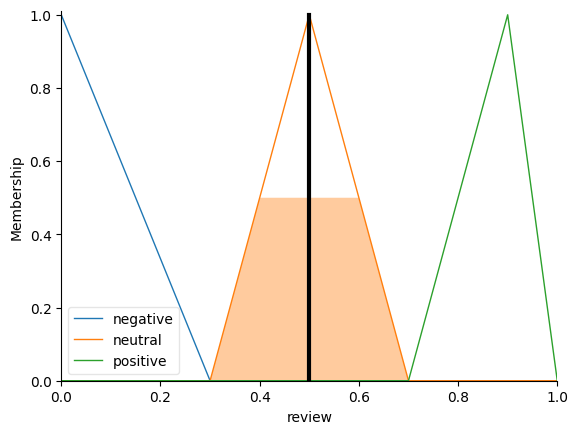

In [ ]:
#2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

score=ctrl.Antecedent(np.arange(0,1.1,0.1),'score')
intensity=ctrl.Antecedent(np.arange(0,1.1,0.1),'intensity')
positiveword=ctrl.Antecedent(np.arange(0,10.1,0.1),'positiveword')
negativeword=ctrl.Antecedent(np.arange(0,10.1,0.1),'negativeword')
review=ctrl.Consequent(np.arange(0,1.1,0.1),'review')

score['negative']=fuzz.trimf(score.universe,[0,0,0.3])
score['neutral']=fuzz.trimf(score.universe,[0.3,0.5,0.7])
score['positive']=fuzz.trimf(score.universe,[0.7,0.9,1])

intensity['low']=fuzz.trimf(intensity.universe,[0,0,0.4])
intensity['medium']=fuzz.trimf(intensity.universe,[0.3,0.5,0.7])
intensity['high']=fuzz.trimf(intensity.universe,[0.6,0.9,1])

positiveword['few']=fuzz.trimf(positiveword.universe,[0,0,2])
positiveword['some']=fuzz.trimf(positiveword.universe,[2,3,5])
positiveword['many']=fuzz.trimf(positiveword.universe,[4,6,10])

negativeword['few']=fuzz.trimf(negativeword.universe,[0,0,2])
negativeword['some']=fuzz.trimf(negativeword.universe,[2,3,5])
negativeword['many']=fuzz.trimf(negativeword.universe,[4,6,10])

review['negative']=fuzz.trimf(review.universe,[0,0,0.3])
review['neutral']=fuzz.trimf(review.universe,[0.3,0.5,0.7])
review['positive']=fuzz.trimf(review.universe,[0.7,0.9,1])

rule1=ctrl.Rule(score['negative']&intensity['high'],review['negative'])
rule2=ctrl.Rule(score['negative']&intensity['low'],review['neutral'])
rule3=ctrl.Rule(score['neutral']&intensity['medium'],review['neutral'])
rule4=ctrl.Rule(score['neutral']&intensity['low'],review['neutral'])
rule5=ctrl.Rule(positiveword['many']&negativeword['few'],review['positive'])
rule6=ctrl.Rule(positiveword['few']&negativeword['many'],review['negative'])
rule7=ctrl.Rule(positiveword['some']&negativeword['some'],review['neutral'])
rule8=ctrl.Rule(score['negative']&negativeword['many']&intensity['high'],review['negative'])
rule9=ctrl.Rule(score['neutral']&positiveword['some']&intensity['high'],review['neutral'])
rule10=ctrl.Rule(score['positive']&positiveword['many']&intensity['high'],review['positive'])

reviewing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
reviewing = ctrl.ControlSystemSimulation(reviewing_ctrl)

reviewing.input['score']=0.6
reviewing.input['intensity']=0.4
reviewing.input['positiveword']=5
reviewing.input['negativeword']=7
reviewing.compute()

print(reviewing.output['review'])
review.view(sim=reviewing)




18.791923234887665
31.184955312592713
2.4999999999999996


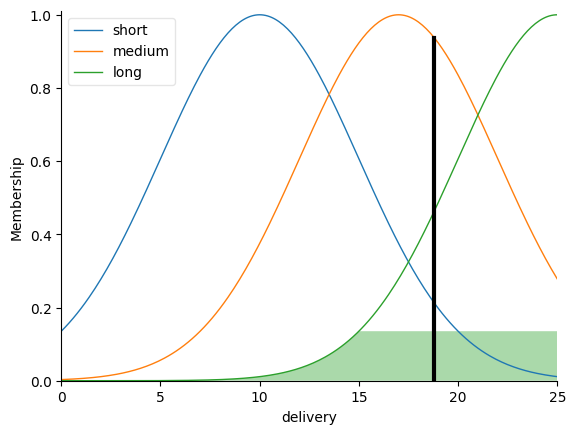

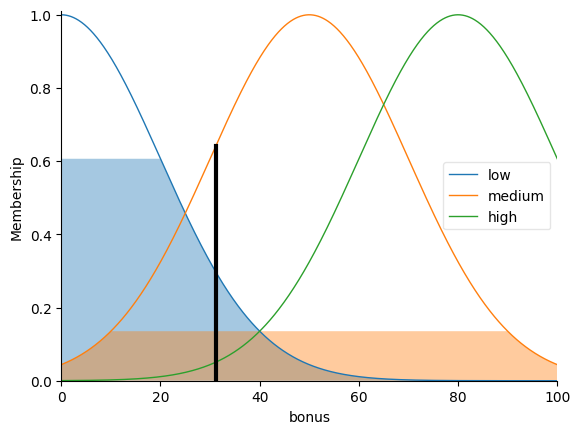

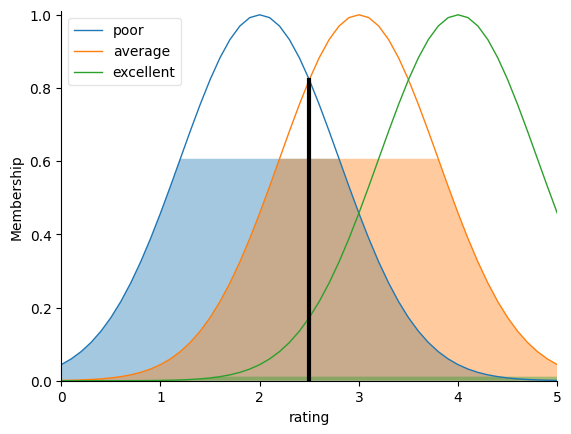

In [ ]:
#2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic=ctrl.Antecedent(np.arange(0,1.1,0.1),'traffic')
distance=ctrl.Antecedent(np.arange(0,10.1,0.1),'distance')
weather=ctrl.Antecedent(np.arange(0,1.1,0.1),'weather')
time=ctrl.Antecedent(np.arange(0,15.1,0.1),'time')
level=ctrl.Antecedent(np.arange(0,1.1,0.1),'level')
delivery=ctrl.Consequent(np.arange(0,25.1,0.1),'delivery')
bonus=ctrl.Consequent(np.arange(0,100.1,0.1),'bonus')
rating=ctrl.Consequent(np.arange(0,5.1,0.1),'rating')

traffic['low']=fuzz.gaussmf(traffic.universe,0.4,0.1)
traffic['medium']=fuzz.gaussmf(traffic.universe,0.6,0.1)
traffic['high']=fuzz.gaussmf(traffic.universe,0.8,0.1)

distance['short']=fuzz.gaussmf(distance.universe,3,0.5)
distance['medium']=fuzz.gaussmf(distance.universe,6,0.5)
distance['long']=fuzz.gaussmf(distance.universe,8,0.5)

weather['clear']=fuzz.gaussmf(weather.universe,0.3,0.1)
weather['rainy']=fuzz.gaussmf(weather.universe,0.6,0.1)
weather['stormy']=fuzz.gaussmf(weather.universe,0.9,0.1)

time['fast']=fuzz.gaussmf(time.universe,6,0.5)
time['medium']=fuzz.gaussmf(time.universe,10,0.5)
time['slow']=fuzz.gaussmf(time.universe,15,0.5)

level['low']=fuzz.gaussmf(level.universe,0.4,0.1)
level['medium']=fuzz.gaussmf(level.universe,0.6,0.1)
level['high']=fuzz.gaussmf(level.universe,0.8,0.1)

delivery['short']=fuzz.gaussmf(delivery.universe,10,5)
delivery['medium']=fuzz.gaussmf(delivery.universe,17,5)
delivery['long']=fuzz.gaussmf(delivery.universe,25,5)

bonus['low']=fuzz.gaussmf(bonus.universe,0,20)
bonus['medium']=fuzz.gaussmf(bonus.universe,50,20)
bonus['high']=fuzz.gaussmf(bonus.universe,80,20)

rating['poor']=fuzz.gaussmf(rating.universe,2,0.8)
rating['average']=fuzz.gaussmf(rating.universe,3,0.8)
rating['excellent']=fuzz.gaussmf(rating.universe,4,0.8)

rule1=ctrl.Rule(traffic['low']&distance['short'],delivery['short'])
rule2=ctrl.Rule(traffic['medium']&distance['medium'],delivery['medium'])
rule3=ctrl.Rule(traffic['high']&distance['long'],delivery['long'])
rule4=ctrl.Rule(weather['clear'],bonus['low'])
rule5=ctrl.Rule(weather['rainy'],bonus['medium'])
rule6=ctrl.Rule(weather['stormy'],bonus['high'])
rule7=ctrl.Rule(time['fast']&traffic['low'],delivery['short'])
rule8=ctrl.Rule(time['medium']&traffic['medium'],delivery['medium'])
rule9=ctrl.Rule(time['slow']&traffic['high'],delivery['long'])
rule10=ctrl.Rule(level['low'],rating['excellent'])
rule11=ctrl.Rule(level['medium'],rating['average'])
rule12=ctrl.Rule(level['high'],rating['poor'])
rule13=ctrl.Rule(distance['long']&weather['stormy']&traffic['high'],delivery['long'],bonus['high'])
rule14=ctrl.Rule(distance['short']&weather['clear']&traffic['low'],delivery['short'],bonus['low'])
rule15=ctrl.Rule(level['high']&traffic['high'],rating['poor'],delivery['long'])

deliverying_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
deliverying=ctrl.ControlSystemSimulation(deliverying_ctrl)

deliverying.input['traffic']=0.6
deliverying.input['distance']=8
deliverying.input['weather']=0.4
deliverying.input['time']=15
deliverying.input['level']=0.7
deliverying.compute()

print(deliverying.output['delivery'])
print(deliverying.output['bonus'])
print(deliverying.output['rating'])
delivery.view(sim=deliverying)
bonus.view(sim=deliverying)
rating.view(sim=deliverying)

69.3643057111809


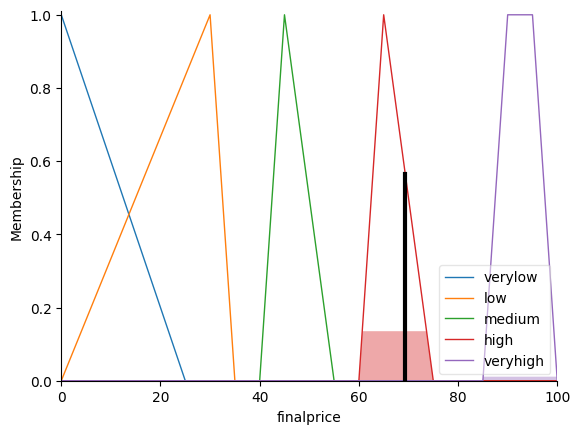

In [ ]:
#2.11
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

demand=ctrl.Antecedent(np.arange(0,1.1,0.1),'demand')
competitor=ctrl.Antecedent(np.arange(0,100.1,0.1),'competitor')
production = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'production')
seasonality=ctrl.Antecedent(np.arange(0,1.1,0.1),'seasonality')
stocklevel=ctrl.Antecedent(np.arange(0,100.1,0.1),'stocklevel')
finalprice=ctrl.Consequent(np.arange(0,100.1,0.1),'finalprice')

demand['low']=fuzz.gaussmf(demand.universe,0,0.1)
demand['medium']=fuzz.gaussmf(demand.universe,0.4,0.1)
demand['high']=fuzz.gaussmf(demand.universe,1,0.1)

competitor['low']=fuzz.gaussmf(competitor.universe,0,10)
competitor['medium']=fuzz.gaussmf(competitor.universe,40,10)
competitor['high']=fuzz.gaussmf(competitor.universe,100,10)

cost['low']=fuzz.gaussmf(cost.universe,0,10)
cost['medium']=fuzz.gaussmf(cost.universe,75,10)
cost['high']=fuzz.gaussmf(cost.universe,100,10)

seasonality['off_peak']=fuzz.gaussmf(seasonality.universe,0,1)
seasonality['normal']=fuzz.gaussmf(seasonality.universe,0.4,0.1)
seasonality['peak']=fuzz.gaussmf(seasonality.universe,1,0.1)

stocklevel['low']=fuzz.gaussmf(stocklevel.universe,0,10)
stocklevel['medium']=fuzz.gaussmf(stocklevel.universe,50,10)
stocklevel['high']=fuzz.gaussmf(stocklevel.universe,100,10)


finalprice['verylow'] = fuzz.trimf(finalprice.universe, [0, 0, 25])
finalprice['low'] = fuzz.trimf(finalprice.universe, [0, 30, 35])
finalprice['medium'] = fuzz.trimf(finalprice.universe, [40, 45, 55])
finalprice['high'] = fuzz.trimf(finalprice.universe, [60, 65, 75])
finalprice['veryhigh'] = fuzz.trapmf(finalprice.universe, [85, 90, 95, 100])

rule1=ctrl.Rule(demand['high']&competitor['high']&stocklevel['low'],finalprice['veryhigh'])
rule2=ctrl.Rule(demand['high']&seasonality['peak']&stocklevel['low'],finalprice['veryhigh'])
rule3=ctrl.Rule(demand['medium']&cost['high']&stocklevel['low'],finalprice['veryhigh'])
rule4=ctrl.Rule(demand['high']&competitor['medium']&stocklevel['medium'],finalprice['high'])
rule5=ctrl.Rule(demand['medium']&competitor['high']&stocklevel['low'],finalprice['high'])
rule6=ctrl.Rule(demand['medium']&seasonality['peak']&stocklevel['medium'],finalprice['high'])
rule7=ctrl.Rule(demand['medium']&competitor['medium']&stocklevel['medium'],finalprice['medium'])
rule8=ctrl.Rule(demand['medium']&competitor['high']&stocklevel['medium'],finalprice['medium'])
rule9=ctrl.Rule(demand['low']&competitor['high']&stocklevel['medium'],finalprice['medium'])
rule10=ctrl.Rule(demand['medium']&cost['medium']&stocklevel['medium'],finalprice['medium'])
rule11=ctrl.Rule(demand['low']&competitor['low']&stocklevel['high'],finalprice['low'])
rule12=ctrl.Rule(demand['medium']&cost['medium']&stocklevel['high'],finalprice['low'])
rule13=ctrl.Rule(demand['low']&seasonality['off_peak']&stocklevel['high'],finalprice['low'])
rule14=ctrl.Rule(demand['low']&competitor['low']&stocklevel['high'],finalprice['verylow'])
rule15=ctrl.Rule(demand['low']&seasonality['off_peak']&stocklevel['high'],finalprice['verylow'])
rule16=ctrl.Rule(demand['medium']&competitor['low']&stocklevel['high'],finalprice['verylow'])

finalpricing_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
finalpricing=ctrl.ControlSystemSimulation(finalpricing_ctrl)

finalpricing.input['demand']=60
finalpricing.input['competitor']=50
finalpricing.input['cost']=50
finalpricing.input['seasonality']=6
finalpricing.input['stocklevel']=30
finalpricing.compute()
print(finalpricing.output['finalprice'])
finalprice.view(sim=finalpricing)
